# POSITION OF QUASARS
## Part 1
We now generate fake measurments of the position of a quasar, and we plot the logarithm of the likelihood of the single measurments and of the total dataset.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
def likelihood(mean, sigma, data):
    l = 1.0
    for i in range(0, len(data)):
        l *= st.norm(mean, sigma).pdf(data[i])
    return l

Text(0.5, 1.0, 'Likelihood of single measurments')

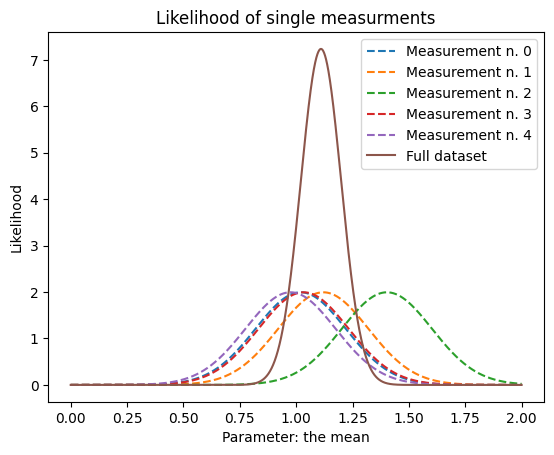

In [3]:
m, s = 1.0, 0.2
N_data = 5
meas = np.zeros(0)

meas = np.append(meas, st.norm(m, s).rvs(N_data))

x_r = np.arange(0, 2, 0.0001)
for i in range(0, N_data):
    plt.plot(x_r, likelihood(x_r, s, [meas[i]]), label = "Measurement n. {}".format(i), ls = '--')
plt.plot(x_r, likelihood(x_r, s, meas), label = "Full dataset")
plt.legend()
plt.xlabel("Parameter: the mean")
plt.ylabel("Likelihood")
plt.title("Likelihood of single measurments")

We now compute the value of the position at which the likelihood is maximized and compare it with the MLE estimator: the arithmetic mean.

In [4]:
x_max_l = np.argsort(likelihood(x_r, s, meas))
x_max_l = x_max_l[len(x_max_l) - 1]
print("Maximum likelihood computed: {:.3f}".format(x_r[x_max_l]))
print("ML estimator: {:.3f}".format(np.mean(meas)))

Maximum likelihood computed: 1.110
ML estimator: 1.110


Obviously the two are the same: the second is obtainend analytically maximizing the likelihood, which is what we've done (but numerically) to compute the first!

## Part 2
Now we compute the error computing numerically the second derivative and using the formula of the Fisher error. Then we compare the result to the theoretical result: the standard error of the mean.

In [5]:
err_num = np.sqrt(-1/(np.diff(np.log(likelihood(x_r, s, meas)), n=2)[x_max_l]/((x_r[1] - x_r[0])**2)))
print("Fisher error, computed: {:.3f}".format(err_num))
print("Fisher error, theoretical: {:.3f}".format(s/np.sqrt(N_data)))

Fisher error, computed: 0.089
Fisher error, theoretical: 0.089


Text(0, 0.5, 'Probability')

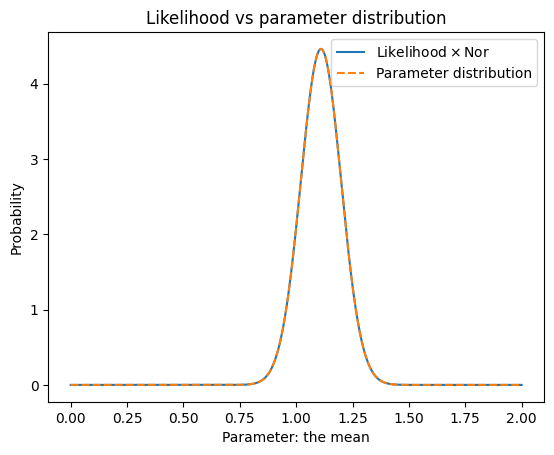

In [6]:
nor = np.max(st.norm(x_r[x_max_l], err_num).pdf(x_r))/np.max(likelihood(x_r, s, meas))
plt.plot(x_r, nor*likelihood(x_r, s, meas), label = r"$\mathrm{Likelihood} \times \mathrm{Nor}$")
plt.plot(x_r, st.norm(x_r[x_max_l], err_num).pdf(x_r), ls='--', label = "Parameter distribution")
plt.legend()
plt.title("Likelihood vs parameter distribution")
plt.xlabel("Parameter: the mean")
plt.ylabel("Probability")

Aside from a scale factor, they are basically the same ditribution.

## Part 3
Generalizetion to heteroscedastic measurements.
### Plots and mean

In [7]:
def likelihood_het(mean, sigma, data):
    l = 1.0
    for i in range(0, len(data)):
        l *= st.norm(mean, sigma[i]).pdf(data[i])
    return l

Text(0.5, 1.0, 'Likelihood of single measurments')

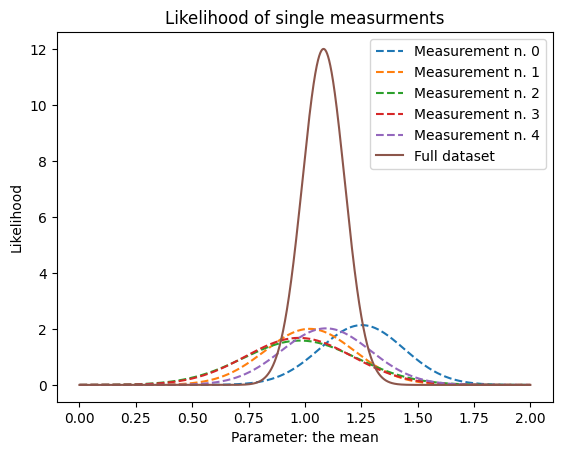

In [8]:
m, s, sigma_s= 1.0, 0.2, 0.05
N_data = 5
meas = np.zeros(0)
errs = np.zeros(0)

meas = np.append(meas, st.norm(m, s).rvs(N_data))
errs = np.append(errs, st.norm(s, sigma_s).rvs(N_data))

x_r = np.arange(0, 2, 0.0001)
for i in range(0, N_data):
    plt.plot(x_r, likelihood_het(x_r, [errs[i]], [meas[i]]), label = "Measurement n. {}".format(i), ls = '--')
plt.plot(x_r, likelihood_het(x_r, errs, meas), label = "Full dataset")
plt.legend()
plt.xlabel("Parameter: the mean")
plt.ylabel("Likelihood")
plt.title("Likelihood of single measurments")

### Errors

In [9]:
x_max_l = np.argsort(likelihood_het(x_r, errs, meas))
x_max_l = x_max_l[len(x_max_l) - 1]
print("Maximum likelihood computed: {:.3f}".format(x_r[x_max_l]))
print("ML estimator: {:.3f}".format(np.average(meas, weights=1/errs**2)))

Maximum likelihood computed: 1.083
ML estimator: 1.083


In [10]:
err_num = np.sqrt(-1/(np.diff(np.log(likelihood_het(x_r, errs, meas)), n=2)[x_max_l]/((x_r[1] - x_r[0])**2)))
print("Fisher error, computed: {:.3f}".format(err_num))
print("Fisher error, theoretical: {:.3f}".format(1/np.sqrt(np.sum(1/errs**2))))

Fisher error, computed: 0.094
Fisher error, theoretical: 0.094


Text(0, 0.5, 'Probability')

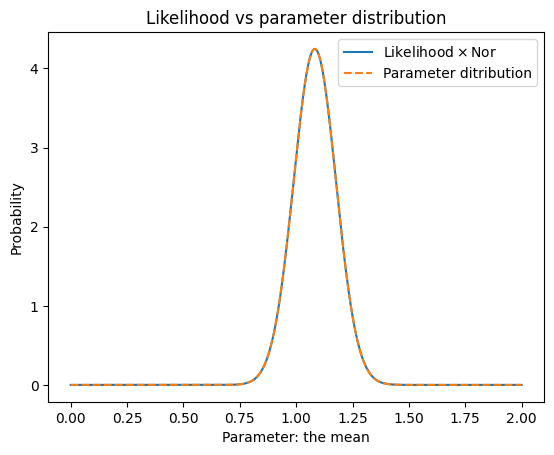

In [11]:
nor2 = np.max(st.norm(x_r[x_max_l], err_num).pdf(x_r))/np.max(likelihood_het(x_r, errs, meas))
plt.plot(x_r, nor2*likelihood_het(x_r, errs, meas), label = r"$\mathrm{Likelihood} \times \mathrm{Nor}$")
plt.plot(x_r, st.norm(x_r[x_max_l], err_num).pdf(x_r), ls='--', label = "Parameter ditribution")
plt.legend()
plt.title("Likelihood vs parameter distribution")
plt.xlabel("Parameter: the mean")
plt.ylabel("Probability")